<a href="https://colab.research.google.com/github/lasyaEd/MovieReviewAnalysis/blob/main/01_exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploratory Data Analysis of "Gone with the wind" IMDB Movie Reviews**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/goneWithTheWind.xlsx'


In [4]:
import pandas as pd
df = pd.read_excel(file_path)
df.head()

Review_Date                Author  Rating  \
0  20 November 2017  paskuniag-584-890551     9.0   
1  10 November 2019           daisukereds     8.0   
2    7 January 2005      angel_de_tourvel     8.0   
3  15 December 2019          IshtiaqAhmed    10.0   
4      12 June 2020               Turanic    10.0   

                                        Review_Title  \
0                    Like the film? Read the book.\n   
1     Even after years of being made.. it is good!\n   
2             An immortal and towering achievement\n   
3   Miracle in Film Making - Can't believe they d...   
4      The tragedy of Scarlet the wise 2020 review\n   

                                              Review  \
0  I've seen the film many times, have always enj...   
1  I wish people made more movies like this nowad...   
2  It is always in people's nature to put down gr...   
3  This movie was on my watch list since 1996 or ...   
4  At first you would think, the main theme of th...   

                       Review_Url  
0  /review/rw9937224/?ref_=tt_urv  
1  /review/rw9937224/?ref_=tt_urv  
2  /review/rw9937224/?ref_=tt_urv  
3  /review/rw9937224/?ref_=tt_urv  
4  /review/rw9937224/?ref_=tt_urv

## Data Preparation:

Understanding the columns of the movie reviews file:

Review_Date: The date the review was written

Author: The name of the reviewer

Rating: The rating given by the author (scale of 1 to 10)

Review_Title: The summary given by the reviewer

Review: The entire opinion of the reviewer about the title

Review_Url: The URL of the review.

**Applied the below string cleaning steps.**

  * Removed non-alphanumerics
  * Removed URLs
  * Removed line breaks
  * Replaced more than one whitespace with a single space





In [5]:
import re

def clean_text(a):
    # Remove non-alphanumerics
    a = re.sub('[^A-Za-z0-9]+', ' ', a)
    # Remove URLs
    a = re.sub(r'http\S+|www\S+|https\S+', '', a, flags=re.MULTILINE)
    # Remove line breaks
    a = re.sub(r'\n', ' ', a)
    # Replace more than one whitespace with a single space
    a = re.sub(' +', ' ', a)

    return a.strip()


In [6]:
# Apply clean_text function to the Review column
df['cleaned_review'] = df['Review'].apply(clean_text)

# Print the result
print(df[['Review', 'cleaned_review']])

                                                 Review  \
0     I've seen the film many times, have always enj...   
1     I wish people made more movies like this nowad...   
2     It is always in people's nature to put down gr...   
3     This movie was on my watch list since 1996 or ...   
4     At first you would think, the main theme of th...   
...                                                 ...   
1014  I was 18 years old when I first saw GWTW in Fe...   
1015  Not a great movie, in the strictest sense -- i...   
1016  Gone With the Wind truly was the greatest film...   
1017  It's very hard to write about this film, becau...   
1018  It's not just a story. It's the life of Scarle...   

                                         cleaned_review  
0     I ve seen the film many times have always enjo...  
1     I wish people made more movies like this nowadays  
2     It is always in people s nature to put down gr...  
3     This movie was on my watch list since 1996 or ...  
4

### Feature Engineering:
**Create Review_Date_Cleaned Column**:
Converting Review_Date column to pandas datetime format, this will be useful for EDA.

In [7]:
df['Review_Date_Cleaned'] = pd.to_datetime(df['Review_Date']).dt.date
df.head()

Review_Date                Author  Rating  \
0  20 November 2017  paskuniag-584-890551     9.0   
1  10 November 2019           daisukereds     8.0   
2    7 January 2005      angel_de_tourvel     8.0   
3  15 December 2019          IshtiaqAhmed    10.0   
4      12 June 2020               Turanic    10.0   

                                        Review_Title  \
0                    Like the film? Read the book.\n   
1     Even after years of being made.. it is good!\n   
2             An immortal and towering achievement\n   
3   Miracle in Film Making - Can't believe they d...   
4      The tragedy of Scarlet the wise 2020 review\n   

                                              Review  \
0  I've seen the film many times, have always enj...   
1  I wish people made more movies like this nowad...   
2  It is always in people's nature to put down gr...   
3  This movie was on my watch list since 1996 or ...   
4  At first you would think, the main theme of th...   

                       Review_Url  \
0  /review/rw9937224/?ref_=tt_urv   
1  /review/rw9937224/?ref_=tt_urv   
2  /review/rw9937224/?ref_=tt_urv   
3  /review/rw9937224/?ref_=tt_urv   
4  /review/rw9937224/?ref_=tt_urv   

                                      cleaned_review Review_Date_Cleaned  
0  I ve seen the film many times have always enjo...          2017-11-20  
1  I wish people made more movies like this nowadays          2019-11-10  
2  It is always in people s nature to put down gr...          2005-01-07  
3  This movie was on my watch list since 1996 or ...          2019-12-15  
4  At first you would think the main theme of the...          2020-06-12

##### **Create Time Period**

Let us take a quick look at the Review published year.

In [8]:
pd.to_datetime(df['Review_Date']).dt.year.value_counts()

Review_Date
2020    80
2006    61
2004    58
2002    55
2003    51
1999    48
2005    48
2000    44
2019    44
2021    43
2001    43
2018    42
2023    40
2022    40
2017    34
2007    33
2008    32
2013    30
2009    29
2015    25
2014    25
1998    23
2016    22
2024    20
2012    19
2011    18
2010    12
Name: count, dtype: int64

80 reviews in 2020 reflect a substantial increase from 2018's and 2019's review count. The pandemic and subsequent lockdowns led to people spending more time at home and consuming more media, including classic films. My assumption is that with many individuals seeking entertainment during periods of isolation, films like "Gone with the Wind" that are widely regarded as classics likely saw a resurgence in viewership and discussion.

For analyzing cultural evolution in movie reviews over an extended period, it's useful to segment the data into meaningful intervals that reflect significant cultural or societal changes.

1. *Initial Period (1998-2004)*

  Early internet era; rise of online movie databases and review platforms. This period marks the beginning of widespread internet usage and the initial proliferation of online movie reviews.
2. *Expansion and Growth (2005-2010)*

  Growth of social media, user-generated content, and the influence of online platforms like YouTube and Facebook. Increasing democratization of movie reviews and greater diversity in review sources.
3. *Mobile and Social Media Boom (2011-2015)*

  Explosion of smartphone usage, the rise of platforms like Twitter, Instagram, and the continued growth of online review sites. More immediate and widespread sharing of opinions, further diversifying review content and formats.
4. *Streaming Era and Globalization (2016-2019)*

  Rapid growth of streaming services (e.g., Netflix, Amazon Prime) and global access to content. Increased accessibility to movies and reviews from a global audience, reflecting diverse cultural perspectives.
5. *Pandemic and Post-Pandemic Period (2020-2024)*

  Impact of the COVID-19 pandemic on media consumption habits, increased streaming, and online engagement. Significant changes in how movies are consumed and reviewed, potentially reflecting shifts in cultural attitudes and behaviors during and after the pandemic.

I'm dividing the time frame to 5 periods for further analysis.

In [17]:
import numpy as np

# Ensure 'Review_Date' is in datetime format
df['Review_Date'] = pd.to_datetime(df['Review_Date'])

# Create the 'Period' column with appropriate labels
df['Period'] = np.where(df['Review_Date'].dt.year >= 2020, '5. 2020-2024',
                        np.where(df['Review_Date'].dt.year >= 2016, '4. 2016-2019',
                                 np.where(df['Review_Date'].dt.year >= 2011, '3. 2011-2015',
                                          np.where(df['Review_Date'].dt.year >= 2005, '2. 2005-2010',
                                                   '1. 1998-2004'))))

# Display the count of reviews in each period
print(df['Period'].value_counts())

Period
1. 1998-2004    322
5. 2020-2024    223
2. 2005-2010    215
4. 2016-2019    142
3. 2011-2015    117
Name: count, dtype: int64


## Data pre-processing

**Create review_lemmas column**: This will be useful during EDA/creating wordclouds.

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
def lemmatize_text(text):
    lemmatizer = nltk.WordNetLemmatizer()
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    stop_words = set(stopwords.words('english'))
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text.lower()) if w not in stop_words]

df['review_lemmas'] = df['cleaned_review'].apply(lambda x: lemmatize_text(x))
print(df[['Review', 'cleaned_review', 'review_lemmas']])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                 Review  \
0     I've seen the film many times, have always enj...   
1     I wish people made more movies like this nowad...   
2     It is always in people's nature to put down gr...   
3     This movie was on my watch list since 1996 or ...   
4     At first you would think, the main theme of th...   
...                                                 ...   
1014  I was 18 years old when I first saw GWTW in Fe...   
1015  Not a great movie, in the strictest sense -- i...   
1016  Gone With the Wind truly was the greatest film...   
1017  It's very hard to write about this film, becau...   
1018  It's not just a story. It's the life of Scarle...   

                                         cleaned_review  \
0     I ve seen the film many times have always enjo...   
1     I wish people made more movies like this nowadays   
2     It is always in people s nature to put down gr...   
3     This movie was on my watch list since 1996 or ...

**Create Review_Words Column**: This column tells us how mnay words each review contains. Useful to figure out how many people write more than a word.

In [19]:
df['review_words'] = df['Review'].str.split().str.len()
print(df[['Review', 'review_words']])


                                                 Review  review_words
0     I've seen the film many times, have always enj...           226
1     I wish people made more movies like this nowad...             9
2     It is always in people's nature to put down gr...            90
3     This movie was on my watch list since 1996 or ...            40
4     At first you would think, the main theme of th...           294
...                                                 ...           ...
1014  I was 18 years old when I first saw GWTW in Fe...            22
1015  Not a great movie, in the strictest sense -- i...           104
1016  Gone With the Wind truly was the greatest film...            85
1017  It's very hard to write about this film, becau...           444
1018  It's not just a story. It's the life of Scarle...            82

[1019 rows x 2 columns]


In [12]:
!pip install textblob

In [13]:
from textblob import TextBlob
import pandas as pd

# Function to calculate sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    # Return 'positive', 'negative', or 'neutral'
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the 'cleaned_review' column
df['sentiment'] = df['cleaned_review'].apply(get_sentiment)


Tried using textBlob to generate sentiment column instead of manually labelling. I couldn't use if rating > X, then 1, if ration < X then 0 as suggested in my Milestone 2 review to generate a sentiment column because, 156 reviews don't have a rating.(I didn't want to lose data) Instead I used textBlob to generate sentiments and create wordclouds for both positive and negative sentiments for each period.

In [15]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
custom_stopwords = set(STOPWORDS).union({'film', 'movie','gone','wind'})


## Visualizing Positive and Negative words by using WordCloud


With generating wordclouds based on the period and sentiment, I wished to find cultural nuances of reviewing over a period of time. For example, if a reviewer liked this movie before 2004, what words did he use to describe this movie and vice versa. If a reviewer hated this movie, what words did he use to describe this movie or why did he dislike the movie? With the increased exposure to how oppression impacts marginalised communities in this day and age, i wanted to see if the words like "racism", "slavery" and "confederate" etc are found more between the years of 2022 and 2024.

<ipython-input-20-ea19bee8ccb9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['review_lemmas_str'] = subset['review_lemmas'].apply(lambda x: ' '.join(x))


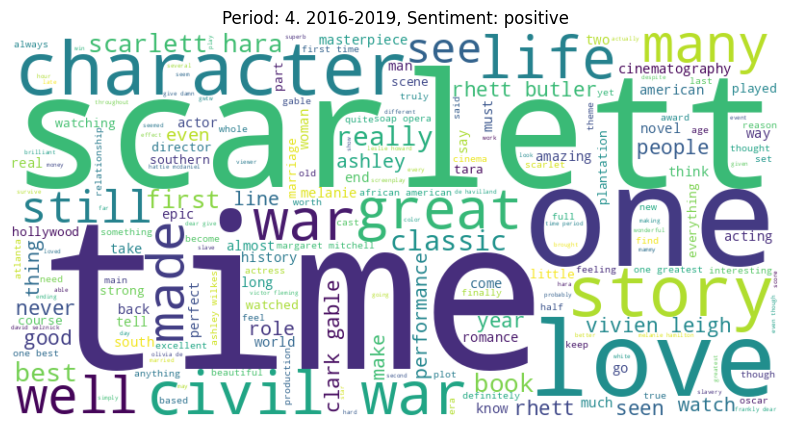

<ipython-input-20-ea19bee8ccb9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['review_lemmas_str'] = subset['review_lemmas'].apply(lambda x: ' '.join(x))


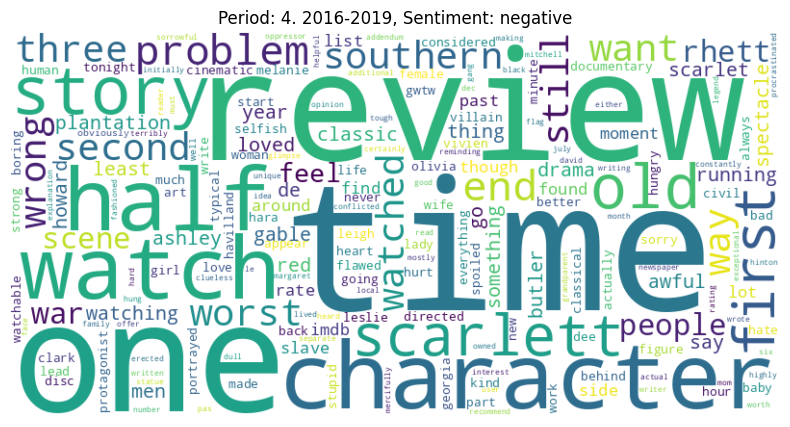

<ipython-input-20-ea19bee8ccb9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['review_lemmas_str'] = subset['review_lemmas'].apply(lambda x: ' '.join(x))


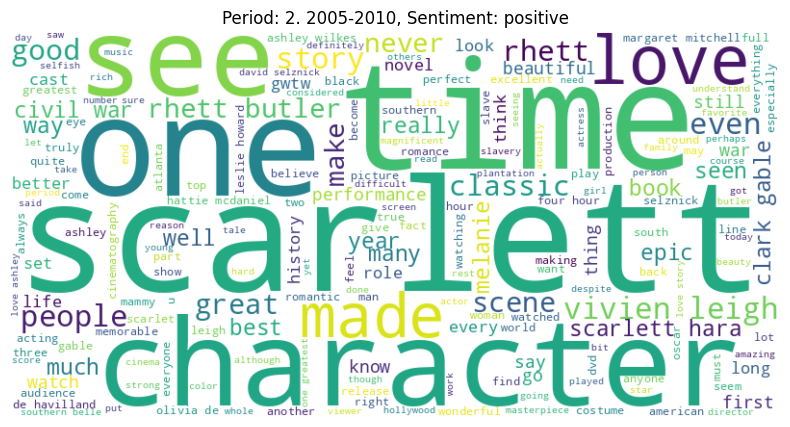

<ipython-input-20-ea19bee8ccb9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['review_lemmas_str'] = subset['review_lemmas'].apply(lambda x: ' '.join(x))


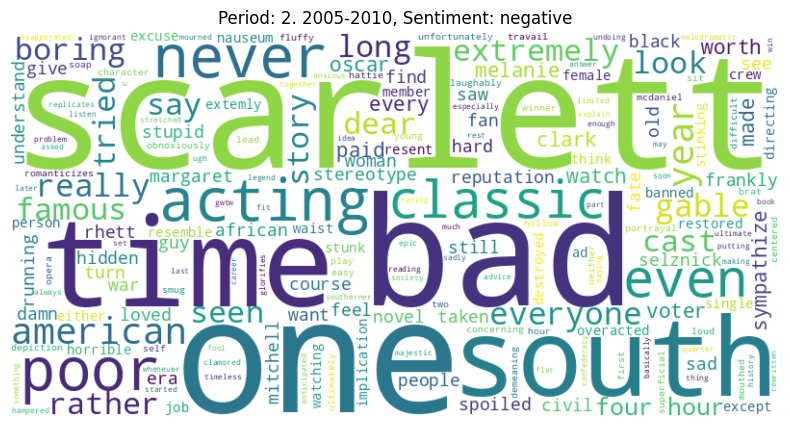

<ipython-input-20-ea19bee8ccb9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['review_lemmas_str'] = subset['review_lemmas'].apply(lambda x: ' '.join(x))


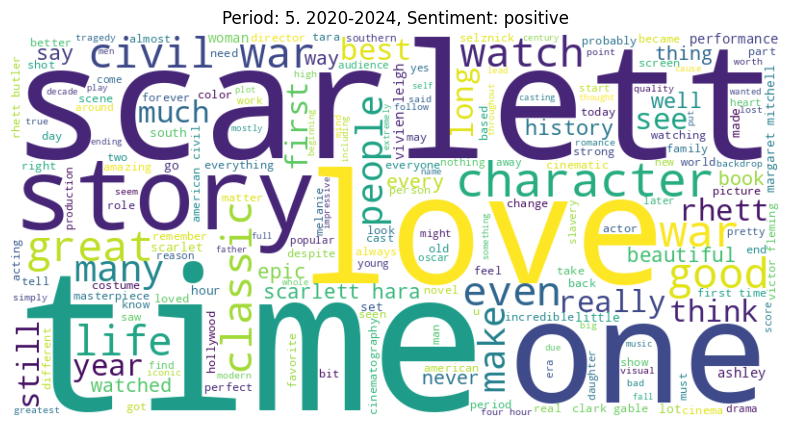

<ipython-input-20-ea19bee8ccb9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['review_lemmas_str'] = subset['review_lemmas'].apply(lambda x: ' '.join(x))


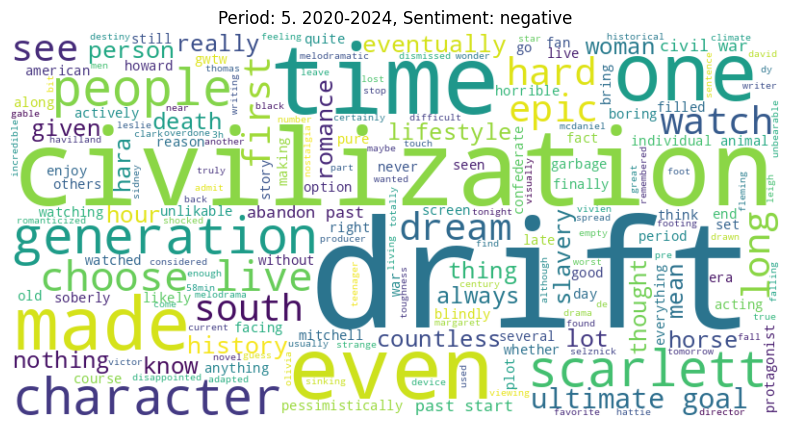

<ipython-input-20-ea19bee8ccb9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['review_lemmas_str'] = subset['review_lemmas'].apply(lambda x: ' '.join(x))


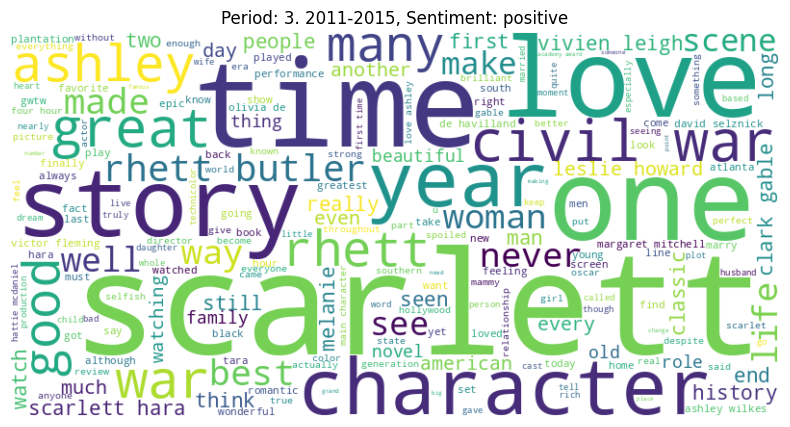

<ipython-input-20-ea19bee8ccb9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['review_lemmas_str'] = subset['review_lemmas'].apply(lambda x: ' '.join(x))


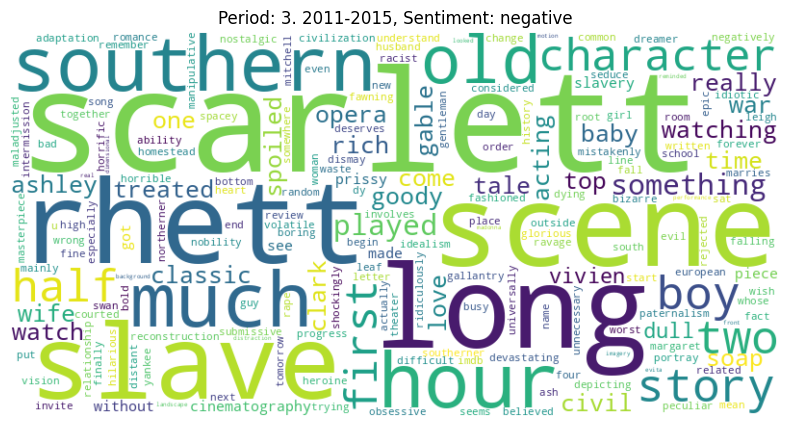

<ipython-input-20-ea19bee8ccb9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['review_lemmas_str'] = subset['review_lemmas'].apply(lambda x: ' '.join(x))


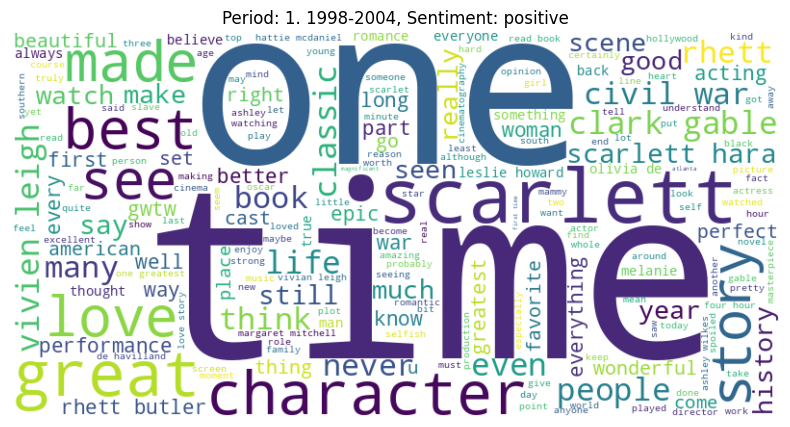

<ipython-input-20-ea19bee8ccb9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['review_lemmas_str'] = subset['review_lemmas'].apply(lambda x: ' '.join(x))


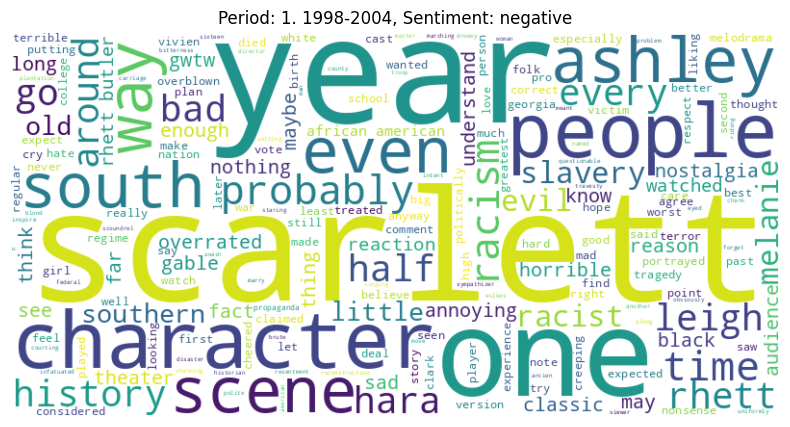

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to generate word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()


# Generate word clouds for each period and sentiment ('positive' and 'negative')
for period in df['Period'].unique():
    for sentiment in ['positive', 'negative']:
        # Filter reviews by period and sentiment
        subset = df[(df['Period'] == period) & (df['sentiment'] == sentiment)]
        # Join lemmas within each review into a single string
        subset['review_lemmas_str'] = subset['review_lemmas'].apply(lambda x: ' '.join(x))
        # Combine all review lemmas into a single text
        text = ' '.join(subset['review_lemmas_str'])
        # Generate word cloud
        title = f'Period: {period}, Sentiment: {sentiment}'
        generate_word_cloud(text, title)

One thing remains constant whether its a positive review or a negative one and that is "Scarlett". I think she is the main character that everyone loves to talk about. As of negative reviews between 1998 and 2004, i see words like "south", "racist", "bad", "slavery" on the other hand, negative reviews between 2011 and 2015 had words like "slave", "southern", "old" etc. I did not find words like these in reviews of period 5(2020-2024). Reviewers with negative reviews between 2005-2010 found the movie boring, they used words like, "bad", "time", "long" to describe the movie.

###EDA: Rating

In [ ]:
# Group by Rating and count the number of occurrences of each rating
rating_counts = df['Rating'].value_counts().sort_index()

print(rating_counts)
print(f"Movies that do not have a rating: {df['Rating'].isnull().sum()}")

print(df['Rating'].agg(['mean','median','count']).round(2))



Rating
1.0      36
2.0      18
3.0      18
4.0      14
5.0      20
6.0      29
7.0      69
8.0      95
9.0     128
10.0    436
Name: count, dtype: int64
Movies that do not have a rating: 156
mean        8.36
median     10.00
count     863.00
Name: Rating, dtype: float64


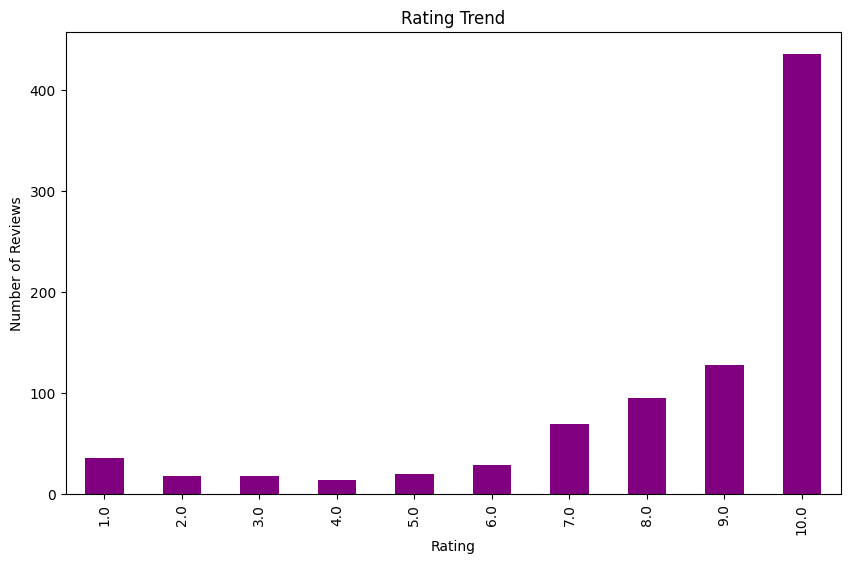

In [ ]:
import matplotlib.pyplot as plt
# Create the bar graph
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='purple')

# Add titles and labels
plt.title('Rating Trend')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

# Display the bar graph
plt.show()


Insights:

* 156 reviews do not have a rating.
* The reviews’ mean rating is 8.4, and the median is 10. Data is skewed to the left
* a lot of reviews have a rating of 10.
* A higher review count is observed when rating is 10.


#### Looking at the top words mentioned in the reviews

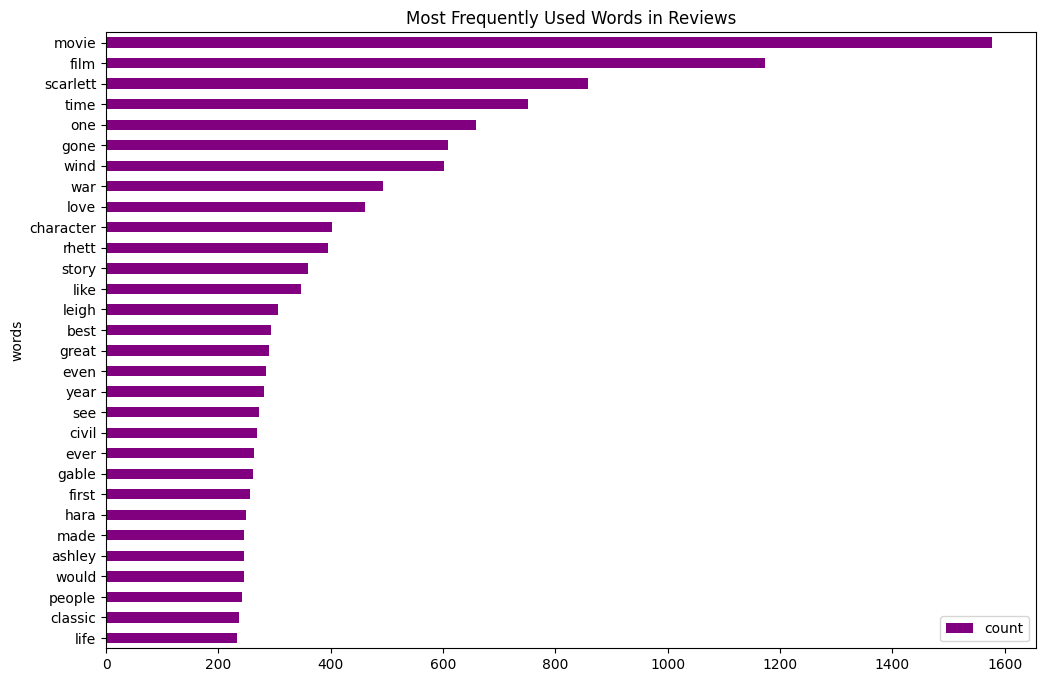

In [21]:
# Get lemmatized tokens from the dataframe
lemmatized_tokens = list(df['review_lemmas'])

# Import necessary libraries and set up for plotting
import matplotlib.pyplot as plt
import itertools
import collections

# Flatten the list of lists into a single list of tokens
token_list = list(itertools.chain(*lemmatized_tokens))

# Count the occurrences of each token
counts_no = collections.Counter(token_list)

# Create a DataFrame with the most common 30 words
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words', 'count'])

# Plot the top words in a horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple")
ax.set_title("Most Frequently Used Words in Reviews")
plt.show()


Excluding all tokens which are obviously going to be present in the review and are not going to add any value to the analysis. I think doing this is essential for extracting meaningful insights.

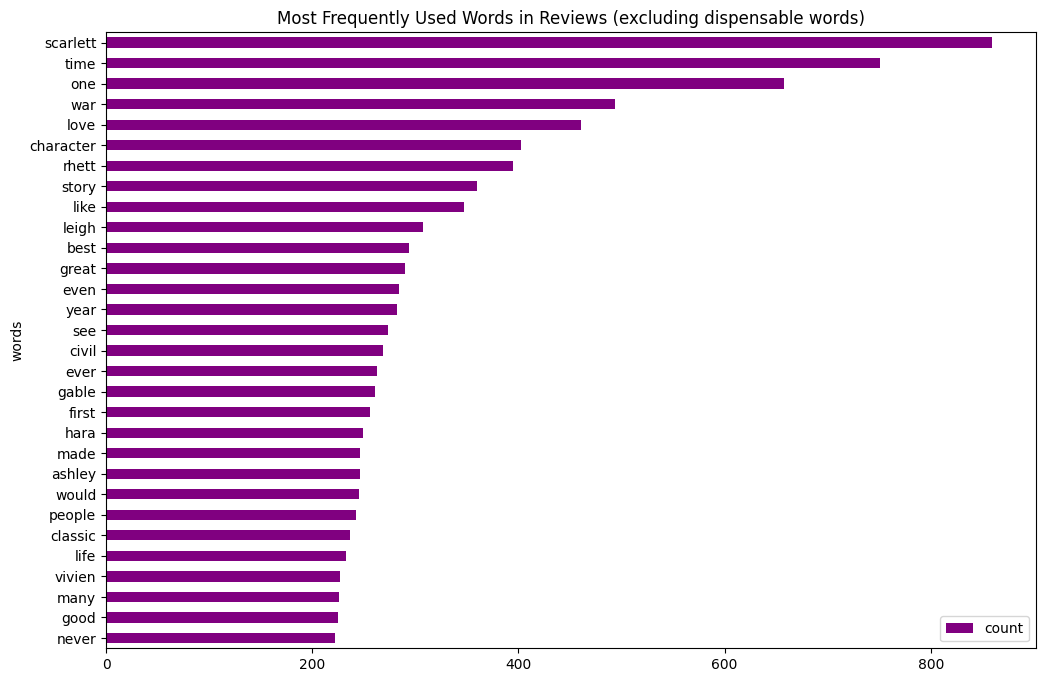

In [22]:
# Get lemmatized tokens from the dataframe
lemmatized_tokens = list(df['review_lemmas'])

# Flatten the list of lists into a single list of tokens
token_list = list(itertools.chain(*lemmatized_tokens))

# Count the occurrences of each token
counts_no = collections.Counter(token_list)

# Remove obvious words from the counts
for word in ['movie', 'film', 'wind', 'gone']:
    counts_no.pop(word, None)

# Create a DataFrame with the most common 30 words
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words', 'count'])

# Plot the top words in a horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple")
ax.set_title("Most Frequently Used Words in Reviews (excluding dispensable words)")
plt.show()


## **Summary of Insights**

+ Character Focus: Reviews frequently discuss the main characters and their portrayals, indicating that the film’s characters are a significant point of discussion.
+ Historical Context: The American Civil War and its impact on the story are central themes.
+ Romantic Elements: Love and relationships play a crucial role in the narrative and are often highlighted.
+ High Praise: The film is consistently described as one of the best, greatest, and a classic, suggesting a strong and positive reception over time.
+ Viewer Engagement: The frequency of words related to viewer experience suggests that the audience's personal connection and responses to the film are often discussed.

#### EDA: Looking at the top bi-grams mentioned in the reviews

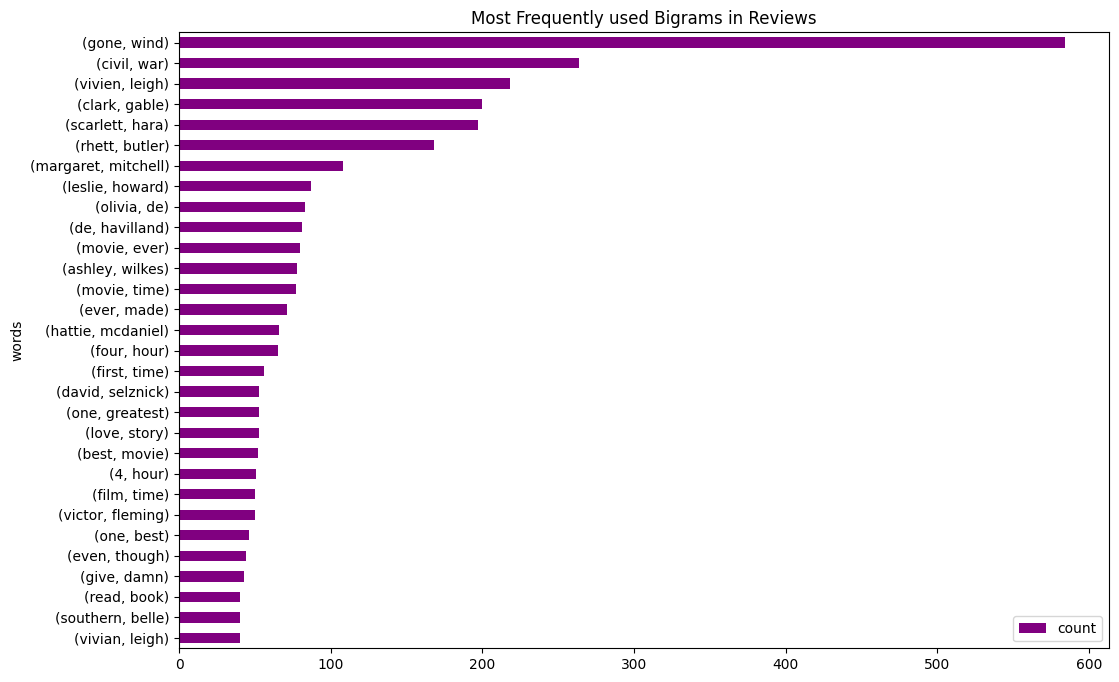

In [23]:
import nltk
from nltk.util import ngrams
counts_no = collections.Counter(ngrams(token_list, 2))
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(12, 8))
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple")
ax.set_title("Most Frequently used Bigrams in Reviews")
plt.show()

### Overall Insights:

**Character Focus**: The bigrams indicate that discussions in reviews often center around key characters (Scarlett O'Hara, Rhett Butler, Ashley Wilkes, Melanie Hamilton) and their actors.

**Historical Context**: The mention of "Civil War" highlights the importance of the film’s historical setting.

**Adaptation Discussion**: References to Margaret Mitchell suggest that the adaptation from novel to film is a point of discussion.

**Actor Performances**: The frequent mention of actors like Vivien Leigh, Clark Gable, and Olivia de Havilland shows that their performances are central to the reviews.

Overall, these bigrams suggest that reviews of "Gone with the Wind" frequently focus on its key characters, the historical context, and the performances of its major actors, reflecting the movie's rich character-driven narrative and its adaptation from a beloved novel.

#### EDA: Looking at the top tri-grams mentioned in the reviews


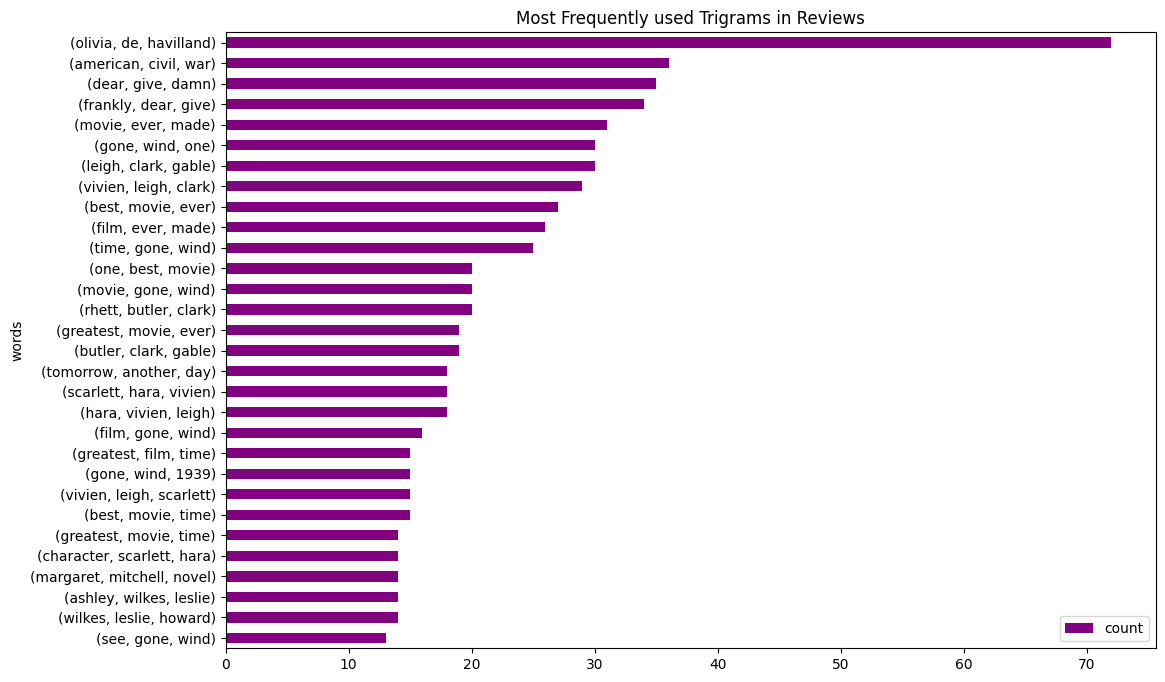

In [24]:
counts_no = collections.Counter(ngrams(token_list, 3))
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(12, 8))
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple")
ax.set_title("Most Frequently used Trigrams in Reviews")
plt.show()

## The trigrams reveal that:

+ "Gone with the Wind" is frequently discussed in terms of its main characters (**Scarlett O'Hara, Rhett Butler, Melanie Hamilton.**) and actors (**Vivien Leigh, Clark Gable, Olivia de Havilland**).
+ The movie is often praised as one of the greatest or best ever made.
+ Key quotes from the film are prominent in reviews like **"Frankly, my dear, I don't give a damn,"** suggesting that this iconic quote is frequently mentioned
along with Scarlett O'Hara’s famous line, **"Tomorrow is another day,"** indicating its prominence in discussions.
+ The film's setting during the **American Civil War** is a notable aspect.
+ The connection to **Margaret Mitchell’s novel** is acknowledged.

### BERTopic:

Trying to identify topics using BERTopic.

In [26]:
# Install necessary libraries if you haven't already
!pip install bertopic[visualizations]
!pip install sentence_transformers

import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [27]:
# Fit BERTopic on your movie reviews using BERT embeddings
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(df['cleaned_review'])

topic_model.get_topic_info()
topic_model.visualize_topics()

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

I did not like how I can see stopwords in my topic visulaization. It does not seem useful to me. So, in the below code, I'm removing stopwords and creating a model using the cleaned_reviews_without_stopwords.

In [28]:
# Function to remove stop words
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Apply stop words removal
df['cleaned_review_without_stopwords'] = df['cleaned_review'].apply(remove_stopwords)

# Fit BERTopic on your cleaned movie reviews using BERT embeddings
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(df['cleaned_review_without_stopwords'])

# Retrieve the most frequent topics
top_topics = topic_model.get_topics()

# Print top words from each topic
for topic_id, top_words in top_topics.items():
    top_words_str = ', '.join(word for word, _ in top_words)  # Extract words from tuples
    print(f"Topic {topic_id}: {top_words_str}")

Topic -1: movie, film, one, time, scarlett, love, gone, wind, book, war
Topic 0: gone, wind, film, movie, 1939, time, one, films, best, years
Topic 1: movie, film, time, watch, one, long, movies, hours, watched, half
Topic 2: scarlett, gone, wind, rhett, movie, war, ashley, love, hara, butler
Topic 3: slavery, war, civil, movie, history, film, southern, people, south, american
Topic 4: leigh, gable, film, vivien, clark, movie, best, ever, great, time
Topic 5: scarlett, love, character, movie, war, life, story, husband, people, even
Topic 6: scarlett, rhett, film, movie, ashley, war, one, wind, gone, gable
Topic 7: war, scarlett, mitchell, civil, novel, margaret, american, hara, film, wind
Topic 8: gwtw, dvd, time, movies, film, greatest, 65th, screen, years, watched
Topic 9: scarlett, played, leigh, rhett, one, ashley, butler, mitchell, book, howard
Topic 10: selznick, david, film, studio, project, producer, book, time, became, international
Topic 11: loved, older, cause, good, like, m

In [29]:
topic_model.visualize_topics()
